C'est vraiment une étape à ne pas négliger, les meilleurs data scientists ne sont pas ceux qui connaissent les algorithmes les plus complexes mais ceux qui ont une très bonne connaissance des données, et ont préparé le terrain avec soin en amont.

Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("house.csv")
data=data[data.loyer<7000]

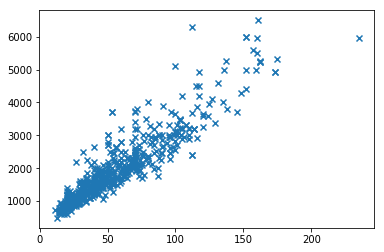

In [18]:
plt.scatter(data.surface,data.loyer,marker="x")

In [49]:
X=np.matrix([np.ones(data.shape[0]),data.surface]).T
y=np.matrix([data.loyer]).T
theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_ridge=np.linalg.inv(X.T.dot(X)+np.identity(2)).dot(X.T).dot(y)

In [50]:
theta

matrix([[359.52266178],
        [ 28.6687785 ]])

In [51]:
theta_ridge

matrix([[356.9361948 ],
        [ 28.70173609]])

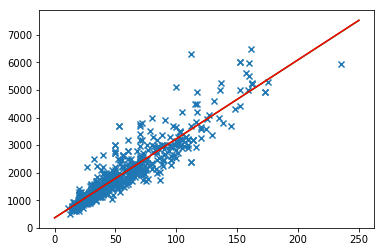

In [52]:
fig=plt.figure()
plt.scatter(data.surface,data.loyer,marker="x")
plt.plot([0,250],[theta[0,0],theta[0,0]+250*theta[1,0]],"g")
plt.plot([0,250],[theta_ridge[0,0],theta_ridge[0,0]+250*theta_ridge[1,0]],"r")

In [58]:
theta[0,0]+53*theta[1,0]

1878.9679224479419

In [67]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(np.matrix([data.surface]).T,np.matrix([data.loyer]).T)
print(regr.coef_,regr.intercept_)

[[28.6687785]] [359.52266178]


In [81]:
sample = np.random.randint(data.shape[0], size=data.shape[0]//10)
sampled_data = data.iloc[sample]

In [83]:
sampled_data.head()

,loyer,surface
93,2240,69
418,3750,70
535,1400,20
528,1900,45
428,775,20


In [96]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data.surface, data.loyer, test_size=0.2)